# importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [15]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\ballka\\baseball.csv')
data.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1232.0,1988.957792,14.819625,1962.000,1976.750,1989.000,2002.000,2012.000
RS,1232.0,715.081981,91.534294,463.000,652.000,711.000,775.000,1009.000
RA,1232.0,715.081981,93.079933,472.000,649.750,709.000,774.250,1103.000
W,1232.0,80.904221,11.458139,40.000,73.000,81.000,89.000,116.000
OBP,1232.0,0.326331,0.015013,0.277,0.317,0.326,0.337,0.373
SLG,1232.0,0.397342,0.033267,0.301,0.375,0.396,0.421,0.491
BA,1232.0,0.259273,0.012907,0.214,0.251,0.260,0.268,0.294
Playoffs,1232.0,0.198052,0.398693,0.000,0.000,0.000,0.000,1.000
RankSeason,244.0,3.122951,1.738349,1.000,2.000,3.000,4.000,8.000
RankPlayoffs,244.0,2.717213,1.095234,1.000,2.000,3.000,4.000,5.000


In [17]:
data.dtypes

Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object

In [18]:
data.shape

(1232, 15)

In [19]:
data.nunique()

Team             39
League            2
Year             47
RS              374
RA              381
W                63
OBP              87
SLG             162
BA               75
Playoffs          2
RankSeason        8
RankPlayoffs      5
G                 8
OOBP             72
OSLG            112
dtype: int64

In [20]:
data = data[(data.Year>=1999) & (data.Year <= 2006) & (data.Playoffs == 0)]

data["WPCT"] = data["W"] / data["G"]

data = data[["Year","Team","WPCT","OBP","SLG","BA","OOBP","OSLG"]]

# Preprocessing

In [23]:
data.dropna(inplace=True)
print(data.isna().sum())

Year    0
Team    0
WPCT    0
OBP     0
SLG     0
BA      0
OOBP    0
OSLG    0
dtype: int64


# Exploratory analysis

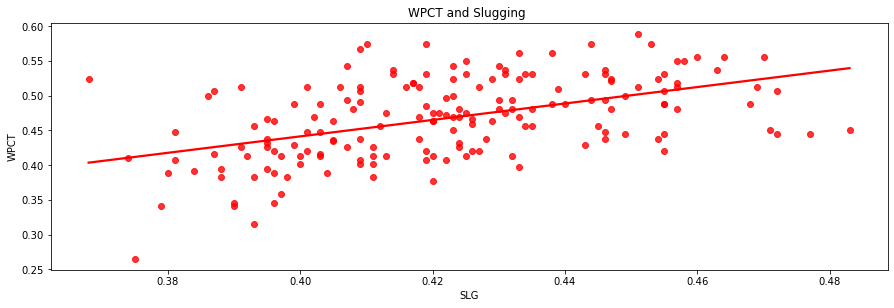

In [30]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
ax1 = plt.title("WPCT and Slugging ")
ax1 = sns.regplot(x="SLG",
           y="WPCT",
           data=data,
           ci=False,color="red")


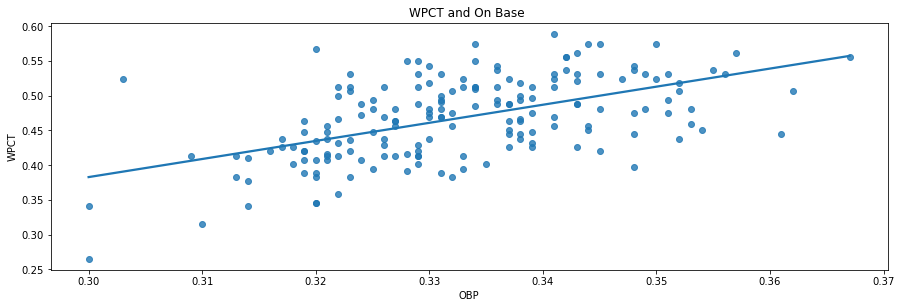

In [31]:
plt.figure(figsize=(15,10))
ax2 = plt.subplot(212)
ax2 = plt.title("WPCT and On Base ")
ax2 = sns.regplot(x="OBP",
           y="WPCT",
           data=data,
           ci=False)

In [32]:
import statsmodels.formula.api as smf

In [33]:
reg_wpt= smf.ols("WPCT ~ OBP + OOBP", data=data).fit()
reg_wpt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     238.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.01e-50
Time:                        20:30:52   Log-Likelihood:                 367.79
No. Observations:                 176   AIC:                            -729.6
Df Residuals:                     173   BIC:                            -720.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4003      0.078      5.104      0.000       0.245       0.555
OBP            2.9952      0.189     15.833      0.000       2.622       3.369
OOBP          -2.7304      0.162    -16.852      0.000      -3.050      -2.411
==============================================================================
Omnibus:                        2.189   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.019
Skew:                          -0.047   Prob(JB):                        0.364
Kurtosis:                       3.516   Cond. No.                         96.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
reg_onp = smf.ols("WPCT ~ OBP + SLG + OOBP + OSLG", data=data).fit()
reg_onp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           7.81e-61
Time:                        20:44:13   Log-Likelihood:                 398.21
No. Observations:                 176   AIC:                            -786.4
Df Residuals:                     171   BIC:                            -770.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4061      0.067      6.027      0.000       0.273       0.539
OBP            2.1016      0.227      9.262      0.000       1.654       2.550
SLG            0.7187      0.114      6.290      0.000       0.493       0.944
OOBP          -1.8211      0.215     -8.490      0.000      -2.245      -1.398
OSLG          -0.7405      0.126     -5.895      0.000      -0.988      -0.493
==============================================================================
Omnibus:                        1.515   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.124
Skew:                          -0.127   Prob(JB):                        0.570
Kurtosis:                       3.298   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
reg_slg = smf.ols("WPCT ~ SLG + OSLG", data=data).fit()
reg_slg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     150.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.57e-38
Time:                        20:51:39   Log-Likelihood:                 339.94
No. Observations:                 176   AIC:                            -673.9
Df Residuals:                     173   BIC:                            -664.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5057      0.061      8.268      0.000       0.385       0.626
SLG            1.4676      0.112     13.053      0.000       1.246       1.690
OSLG          -1.5154      0.111    -13.618      0.000      -1.735      -1.296
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.126
Skew:                          -0.050   Prob(JB):                        0.939
Kurtosis:                       2.915   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.iolib.summary2 import summary_col
Header = ['(1)','(2)','(3)']
Result = summary_col([reg_slg,reg_onp,reg_wpt],
                      regressor_order=['OBP','OOBP','SLG','OSLG'],stars=True, 
                      float_format="'%.3f'",model_names = Header)

In [37]:
print(Result)


                   (1)         (2)         (3)    
--------------------------------------------------
OBP                        '2.102'***  '2.995'*** 
                           ('0.227')   ('0.189')  
OOBP                       '-1.821'*** '-2.730'***
                           ('0.215')   ('0.162')  
SLG            '1.468'***  '0.719'***             
               ('0.112')   ('0.114')              
OSLG           '-1.515'*** '-0.740'***            
               ('0.111')   ('0.126')              
Intercept      '0.506'***  '0.406'***  '0.400'*** 
               ('0.061')   ('0.067')   ('0.078')  
R-squared      '0.634'     '0.811'     '0.734'    
R-squared Adj. '0.630'     '0.807'     '0.731'    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
